# Coursework: Climate data analysis

In [540]:
# python packages needed. You can, of course, use others if you need them.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## TASK I - Preliminary analysis

**a. Import the `weather-denmark-resampled.pkl` dataset  provided  in  the  folderand explore  the dataset by answering the following questions.**

In [541]:
# Loading .pkl files 

f_wdr = open('weather-denmark-resampled.pkl', 'rb')
df = pd.read_pickle(f_wdr)


In [542]:
#################################

df.describe()

#################################

Aalborg                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  333110.000000  333110.000000  333110.000000  333110.000000   
mean        8.323675    1012.743473       4.867406     192.307074   
std         6.986639      11.690186       2.793941      88.071567   
min       -25.000000     951.900000       0.000000      10.000000   
25%         3.100000    1005.700000       2.666667     116.666667   
50%         8.100000    1013.400000       4.600000     210.000000   
75%        13.600000    1020.500000       6.700000     260.000000   
max        30.800000    1050.800000      32.900000     360.000000   

              Aarhus                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  333110.000000  333110.000000  333110.000000  333110.000000   
mean        8.290577    1013.352071       4.036376     201.261096   
std         7.027572      11.277480       2.549404      82.166840   
min       -24.300000     955.500000       0.000000      10.000000   
25%         3.000000    1006.600000       2.100000     140.000000   
50%         8.000000    1014.000000       3.600000     213.333333   
75%        13.500000    1020.800000       5.600000     270.000000   
max        30.900000    1050.000000      33.400000     360.000000   

             Esbjerg                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  333109.000000  332070.000000  333109.000000  333109.000000   
mean        8.537116    1013.131439       4.892615     201.758338   
std         6.743867      10.904699       2.681328      87.880378   
min       -27.000000     959.300000       0.000000      10.000000   
25%         4.000000    1006.954601       2.933333     126.666667   
50%         8.333333    1014.127073       4.516667     216.666667   
75%        13.582857    1019.861904       6.533333     273.703704   
max        54.000000    1049.300000      39.100000     360.000000   

              Odense                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  333110.000000  333110.000000  333110.000000  333110.000000   
mean        8.802755    1013.805596       4.848788     195.840053   
std         6.924723      10.958942       2.768103      83.739036   
min       -22.500000     959.700000       0.000000      10.000000   
25%         3.700000    1007.300000       2.766667     126.666667   
50%         8.600000    1014.433333       4.600000     210.000000   
75%        13.950000    1021.000000       6.635696     260.000000   
max        49.900000    1048.900000      62.521795     360.000000   

            Roskilde                                               
                Temp       Pressure      WindSpeed        WindDir  
count  333109.000000  332346.000000  333109.000000  333109.000000  
mean        8.264180    1012.839357       4.835396     202.708912  
std         7.124592      11.739851       2.755634      86.188538  
min       -21.833333     959.800000       0.000000      10.000000  
25%         3.000000    1006.100000       2.766667     130.000000  
50%         8.000000    1013.833333       4.433333     220.000000  
75%        13.700000    1020.700000       6.574359     270.000000  
max        32.000000    1048.100000      25.000000     360.000000

In [543]:
################################### 
# i.How many cities are there in the dataset?

# df.columns
# print(len(df.columns) / 4)
city = "none"
city_numbers = 0
for i in range(len(df.columns)):
    if df.columns[i][0] != city:
        city = df.columns[i][0]
        city_numbers += 1
print('number of cities: ' + str(city_numbers))

###################################

number of cities: 5


In [544]:
###############################
# ii.How many observations and features are there in this dataset?

df.info()

###############################

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 333110 entries, 1980-03-01 10:00:00 to 2018-03-01 23:00:00
Freq: <pandas._libs.properties.CachedProperty object at 0x000002AA7F13FB48>
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   (Aalborg, Temp)        333110 non-null  float64
 1   (Aalborg, Pressure)    333110 non-null  float64
 2   (Aalborg, WindSpeed)   333110 non-null  float64
 3   (Aalborg, WindDir)     333110 non-null  float64
 4   (Aarhus, Temp)         333110 non-null  float64
 5   (Aarhus, Pressure)     333110 non-null  float64
 6   (Aarhus, WindSpeed)    333110 non-null  float64
 7   (Aarhus, WindDir)      333110 non-null  float64
 8   (Esbjerg, Temp)        333109 non-null  float64
 9   (Esbjerg, Pressure)    332070 non-null  float64
 10  (Esbjerg, WindSpeed)   333109 non-null  float64
 11  (Esbjerg, WindDir)     333109 non-null  float64
 12  (Odense, Temp)         333110 no

In [545]:
#############################################################################
# iii.What are the names of the different features?

df.columns.tolist()

###############################

[('Aalborg', 'Temp'),
 ('Aalborg', 'Pressure'),
 ('Aalborg', 'WindSpeed'),
 ('Aalborg', 'WindDir'),
 ('Aarhus', 'Temp'),
 ('Aarhus', 'Pressure'),
 ('Aarhus', 'WindSpeed'),
 ('Aarhus', 'WindDir'),
 ('Esbjerg', 'Temp'),
 ('Esbjerg', 'Pressure'),
 ('Esbjerg', 'WindSpeed'),
 ('Esbjerg', 'WindDir'),
 ('Odense', 'Temp'),
 ('Odense', 'Pressure'),
 ('Odense', 'WindSpeed'),
 ('Odense', 'WindDir'),
 ('Roskilde', 'Temp'),
 ('Roskilde', 'Pressure'),
 ('Roskilde', 'WindSpeed'),
 ('Roskilde', 'WindDir')]

**b. Now that you got confident with the dataset, evaluate if the dataset contains anymissing values? If so, then remove them using the pandas built-in function.**

In [546]:
###########################

df = df.dropna(how='any')
df.describe()

###########################

Aalborg                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  332070.000000  332070.000000  332070.000000  332070.000000   
mean        8.344553    1012.733809       4.867129     192.403707   
std         6.984943      11.693430       2.794357      88.021967   
min       -25.000000     951.900000       0.000000      10.000000   
25%         3.166667    1005.700000       2.666667     118.333333   
50%         8.111111    1013.400000       4.600000     210.000000   
75%        13.666667    1020.500000       6.700000     260.000000   
max        30.800000    1050.800000      32.900000     360.000000   

              Aarhus                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  332070.000000  332070.000000  332070.000000  332070.000000   
mean        8.312325    1013.346686       4.033814     201.369146   
std         7.024914      11.281176       2.545558      82.112979   
min       -24.300000     955.500000       0.000000      10.000000   
25%         3.067308    1006.600000       2.100000     140.000000   
50%         8.000000    1014.000000       3.600000     213.333333   
75%        13.500000    1020.800000       5.600000     270.000000   
max        30.900000    1050.000000      33.400000     360.000000   

             Esbjerg                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  332070.000000  332070.000000  332070.000000  332070.000000   
mean        8.556717    1013.131439       4.888487     201.843897   
std         6.742853      10.904699       2.680096      87.835192   
min       -27.000000     959.300000       0.000000      10.000000   
25%         4.000000    1006.954601       2.933333     126.666667   
50%         8.333333    1014.127073       4.516667     216.666667   
75%        13.600000    1019.861904       6.533333     273.636364   
max        54.000000    1049.300000      39.100000     360.000000   

              Odense                                               \
                Temp       Pressure      WindSpeed        WindDir   
count  332070.000000  332070.000000  332070.000000  332070.000000   
mean        8.823818    1013.802996       4.846944     195.933713   
std         6.922563      10.962173       2.766738      83.694276   
min       -22.500000     959.700000       0.000000      10.000000   
25%         3.800000    1007.300000       2.766667     126.666667   
50%         8.700000    1014.433333       4.600000     210.000000   
75%        14.000000    1021.000000       6.628571     260.000000   
max        49.900000    1048.900000      62.521795     360.000000   

            Roskilde                                               
                Temp       Pressure      WindSpeed        WindDir  
count  332070.000000  332070.000000  332070.000000  332070.000000  
mean        8.285595    1012.841385       4.831841     202.828090  
std         7.123108      11.744512       2.753835      86.120459  
min       -21.833333     959.800000       0.000000      10.000000  
25%         3.000000    1006.100000       2.766667     130.000000  
50%         8.000000    1013.833333       4.433333     220.000000  
75%        13.800000    1020.700000       6.544828     270.000000  
max        32.000000    1048.100000      25.000000     360.000000

**c. Extract the general statistical properties summarising the minimum, maximum, median, mean and standard deviation values for all the features in the dataset. Spot any anomalies in these properties and clearly explain why you classify them as anomalies.**

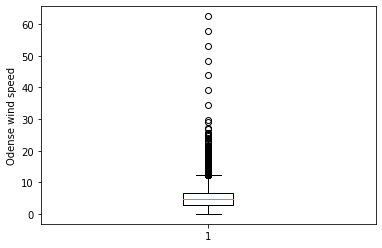

In [547]:
plt.boxplot(x=df['Odense']['WindSpeed'])
plt.ylabel('Odense wind speed')
plt.show()

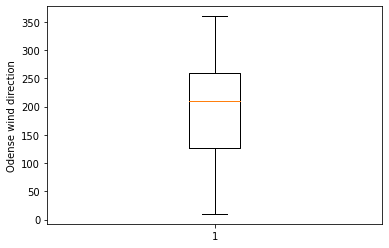

In [548]:
plt.boxplot(x=df['Odense']['WindDir'])
plt.ylabel('Odense wind direction')
plt.show()

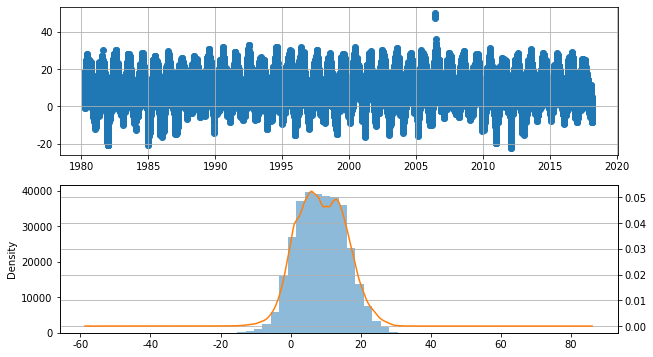

In [549]:
###########################

col = df['Odense']['Temp']
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.scatter(col.index, col.values)
plt.grid()

ax2 = fig.add_subplot(2, 1, 2)
col.hist(bins=30, alpha=0.5, ax=ax2)
col.plot(kind='kde', secondary_y=True, ax=ax2)
plt.grid()

###########################

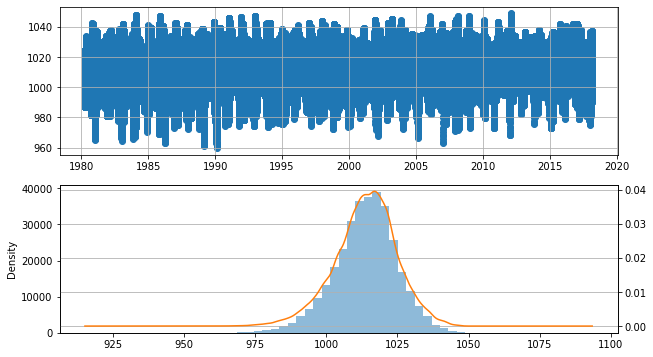

In [550]:
###########################

col = df['Odense']['Pressure']
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.scatter(col.index, col.values)
plt.grid()

ax2 = fig.add_subplot(2, 1, 2)
col.hist(bins=30, alpha=0.5, ax=ax2)
col.plot(kind='kde', secondary_y=True, ax=ax2)
plt.grid()

###########################

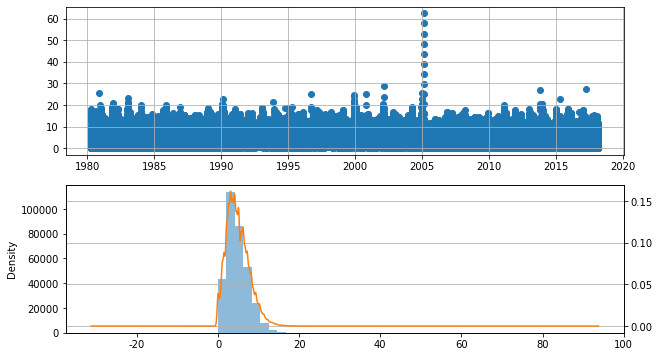

In [551]:
###########################

col = df['Odense']['WindSpeed']
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.scatter(col.index, col.values)
plt.grid()

ax2 = fig.add_subplot(2, 1, 2)
col.hist(bins=30, alpha=0.5, ax=ax2)
col.plot(kind='kde', secondary_y=True, ax=ax2)
plt.grid()

###########################

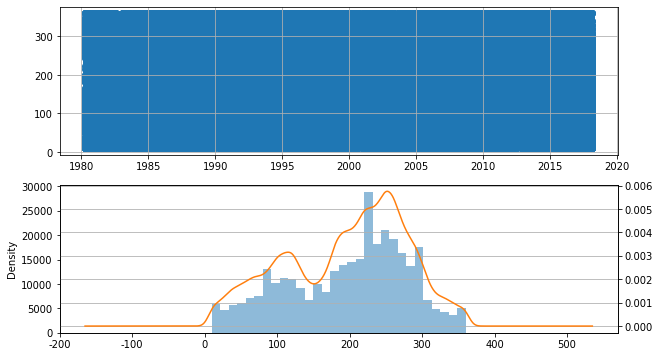

In [552]:
###########################

col = df['Odense']['WindDir']
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.scatter(col.index, col.values)
plt.grid()

ax2 = fig.add_subplot(2, 1, 2)
col.hist(bins=30, alpha=0.5, ax=ax2)
col.plot(kind='kde', secondary_y=True, ax=ax2)
plt.grid()

###########################

In [553]:
###########################

df.min()

###########################

Aalborg   Temp         -25.000000
          Pressure     951.900000
          WindSpeed      0.000000
          WindDir       10.000000
Aarhus    Temp         -24.300000
          Pressure     955.500000
          WindSpeed      0.000000
          WindDir       10.000000
Esbjerg   Temp         -27.000000
          Pressure     959.300000
          WindSpeed      0.000000
          WindDir       10.000000
Odense    Temp         -22.500000
          Pressure     959.700000
          WindSpeed      0.000000
          WindDir       10.000000
Roskilde  Temp         -21.833333
          Pressure     959.800000
          WindSpeed      0.000000
          WindDir       10.000000
dtype: float64

In [554]:
###########################

df.max()

###########################

Aalborg   Temp           30.800000
          Pressure     1050.800000
          WindSpeed      32.900000
          WindDir       360.000000
Aarhus    Temp           30.900000
          Pressure     1050.000000
          WindSpeed      33.400000
          WindDir       360.000000
Esbjerg   Temp           54.000000
          Pressure     1049.300000
          WindSpeed      39.100000
          WindDir       360.000000
Odense    Temp           49.900000
          Pressure     1048.900000
          WindSpeed      62.521795
          WindDir       360.000000
Roskilde  Temp           32.000000
          Pressure     1048.100000
          WindSpeed      25.000000
          WindDir       360.000000
dtype: float64

In [555]:
###########################

df.median()

###########################

Aalborg   Temp            8.111111
          Pressure     1013.400000
          WindSpeed       4.600000
          WindDir       210.000000
Aarhus    Temp            8.000000
          Pressure     1014.000000
          WindSpeed       3.600000
          WindDir       213.333333
Esbjerg   Temp            8.333333
          Pressure     1014.127073
          WindSpeed       4.516667
          WindDir       216.666667
Odense    Temp            8.700000
          Pressure     1014.433333
          WindSpeed       4.600000
          WindDir       210.000000
Roskilde  Temp            8.000000
          Pressure     1013.833333
          WindSpeed       4.433333
          WindDir       220.000000
dtype: float64

In [556]:
###########################

df.mean()

###########################

Aalborg   Temp            8.344553
          Pressure     1012.733809
          WindSpeed       4.867129
          WindDir       192.403707
Aarhus    Temp            8.312325
          Pressure     1013.346686
          WindSpeed       4.033814
          WindDir       201.369146
Esbjerg   Temp            8.556717
          Pressure     1013.131439
          WindSpeed       4.888487
          WindDir       201.843897
Odense    Temp            8.823818
          Pressure     1013.802996
          WindSpeed       4.846944
          WindDir       195.933713
Roskilde  Temp            8.285595
          Pressure     1012.841385
          WindSpeed       4.831841
          WindDir       202.828090
dtype: float64

In [557]:
###########################

df.std()

###########################

Aalborg   Temp          6.984943
          Pressure     11.693430
          WindSpeed     2.794357
          WindDir      88.021967
Aarhus    Temp          7.024914
          Pressure     11.281176
          WindSpeed     2.545558
          WindDir      82.112979
Esbjerg   Temp          6.742853
          Pressure     10.904699
          WindSpeed     2.680096
          WindDir      87.835192
Odense    Temp          6.922563
          Pressure     10.962173
          WindSpeed     2.766738
          WindDir      83.694276
Roskilde  Temp          7.123108
          Pressure     11.744512
          WindSpeed     2.753835
          WindDir      86.120459
dtype: float64

## TASK II - OUTLIERS

The second task is focused on spotting and overcoming outliers. Follow the instructions in the following:

**d. Store the temperature measurements in May 2006 for the city of Odense. Then produce a simple plot of the temperature versus time.**

*HINT: In this dataset, the cities are vertically stacked. Therefore, we have a multi column dataset, which basically works as a nested dictionary.*

<AxesSubplot:xlabel='DateTime'>

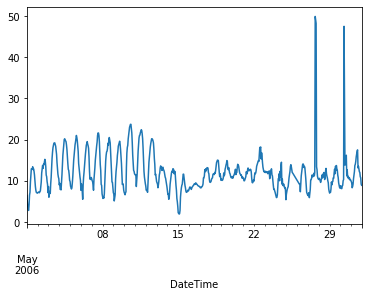

In [558]:
###########################

df['Odense']['Temp']['2006-05'].plot()

###########################

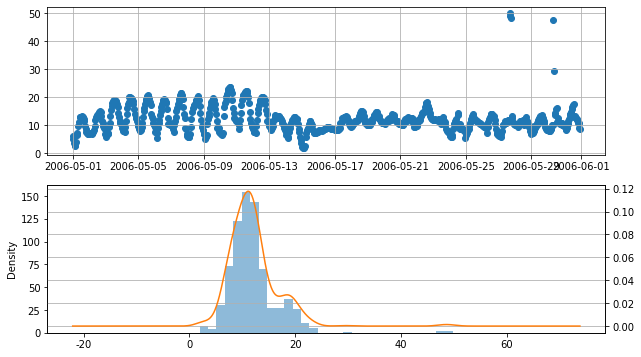

In [559]:
#################################

col = df['Odense']['Temp']['2006-05']
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.scatter(col.index, col.values)
plt.grid()

ax2 = fig.add_subplot(2, 1, 2)
col.hist(bins=30, alpha=0.5, ax=ax2)
col.plot(kind='kde', secondary_y=True, ax=ax2)
plt.grid()

#################################

**e. Find the outliers in this set of measurements (if any) and replace them using linear interpolation.**

<AxesSubplot:xlabel='DateTime'>

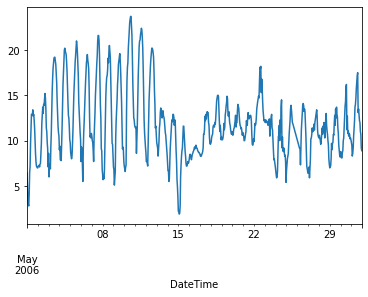

In [560]:
###########################

col = df['Odense']['Temp']['2006-05']
mean = col.mean()
std = col.std()

def get_zscore(x):
    return (x - mean) / std

def temp_map(x):
    zscore = get_zscore(x)
    if zscore < -3 or zscore > 3:
        return np.nan
    else:
        return x

col = col.map(temp_map)
col = col.fillna(col.interpolate())
col.plot()

###########################

## TASK III.1 - CORRELATION

In this last task, you will be seeking correlation between features of the data and inferring hidden patterns.  For  this  task,  you  will  be  working  with  a  smaller  dataset.  Follow  the  instructions  in  the following:

**f. We  now  take  a new  dataset (`df_perth.pkl`),  which  collects  climate  data  of  a  city  in Australia. Here we have just one year of measurements, but more features.**

In [561]:
#################################

f_dp = open('df_perth.pkl', 'rb')
df = pd.read_pickle(f_dp)

#################################

**g. Find any significant correlations between features.**

*HINT: you might find useful looking fortrends and recurrent patterns within the data*

In [562]:
#################################

df.corr(method='spearman')

#################################

,temp,pressure,relative humidity,wind speed,cloud cover,precipitation,PV production,"diffuse radiation, tilt",solar azimuth
temp,1.000000,-0.006230,-0.747670,0.328723,-0.097753,-0.097320,0.522300,0.496630,0.348230
pressure,-0.006230,1.000000,-0.239160,-0.005752,-0.786832,-0.368454,0.112463,-0.080145,0.000875
relative humidity,-0.747670,-0.239160,1.000000,-0.328828,0.287475,0.285383,-0.623184,-0.546019,-0.404348
wind speed,0.328723,-0.005752,-0.328828,1.000000,-0.062524,0.003793,0.247900,0.230227,0.265549
cloud cover,-0.097753,-0.786832,0.287475,-0.062524,1.000000,0.413265,-0.148753,0.066983,-0.016880
precipitation,-0.097320,-0.368454,0.285383,0.003793,0.413265,1.000000,-0.054581,0.032623,0.022433
PV production,0.522300,0.112463,-0.623184,0.247900,-0.148753,-0.054581,1.000000,0.941930,0.033711
"diffuse radiation, tilt",0.496630,-0.080145,-0.546019,0.230227,0.066983,0.032623,0.941930,1.000000,0.037277
solar azimuth,0.348230,0.000875,-0.404348,0.265549,-0.016880,0.022433,0.033711,0.037277,1.000000


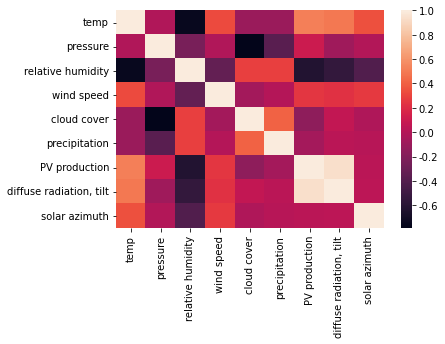

In [563]:
#################################

sn.heatmap(df.corr(method='spearman'))
plt.show()

#################################

**h. We now focus on the correlation between precipitation and cloud cover. We want to infer the probability of having moderate to heavy rain (> 1 mm/h) as a function of the cloud cover index.**

*HINT: you might find useful to create a new column where you have 0 if precipitation < 1 mm/h and 1 otherwise*

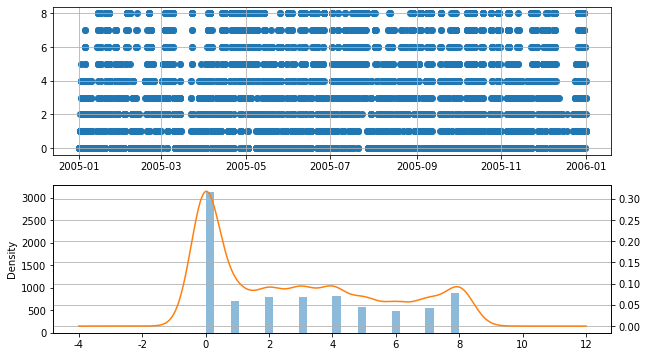

In [564]:
#################################

col = df['cloud cover']
fig = plt.figure(figsize = (10, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.scatter(col.index, col.values)
plt.grid()

ax2 = fig.add_subplot(2, 1, 2)
col.hist(bins=30, alpha=0.5, ax=ax2)
col.plot(kind='kde', secondary_y=True, ax=ax2)
plt.grid()

#################################

In [567]:
#################################

def get_rain_probability(df):
    if df['precipitation'] < 1.0:
        return 0
    else:
        return 1

df.loc[:, 'rain probability'] = df.apply(get_rain_probability, axis=1)
df['cloud cover'].corr(df['rain probability'], method='spearman')

#################################

0.21850693570849422

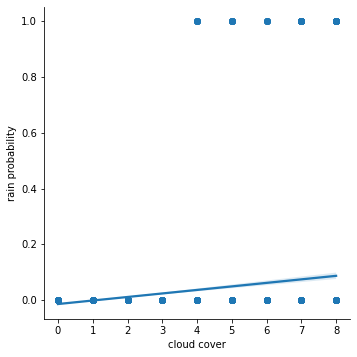

In [568]:
#################################

sn.pairplot(df, x_vars=['cloud cover'], y_vars='rain probability', kind="reg", height=5, aspect=1.0)
plt.show()

#################################

## TASK III.2 - INFERENCE

**i. Let’s now assume that we want to predict the photovoltaic production (PV production) using  multiple  linear  regression.  Explain  which  features  are  statistically  significant  in modelling the target variable.**

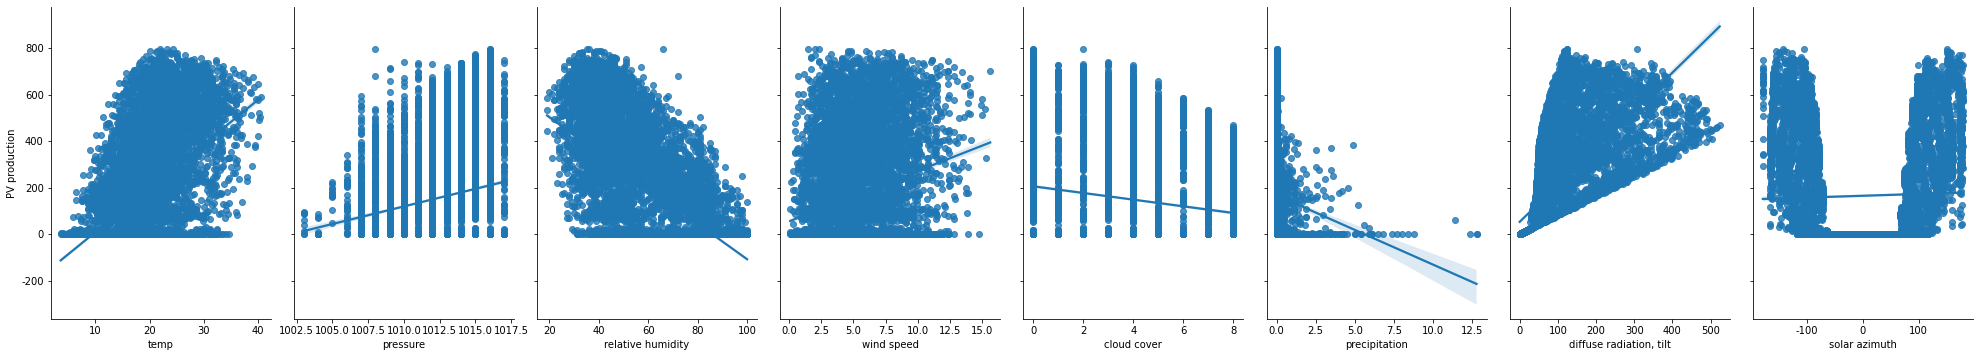

In [569]:
#################################

plt.rcParams['axes.unicode_minus']=False
sn.pairplot(df, x_vars=['temp', 'pressure', 'relative humidity', 'wind speed', 'cloud cover', 'precipitation', 'diffuse radiation, tilt', 'solar azimuth'], y_vars='PV production', kind="reg", height=5, aspect=0.7)
plt.show()

#################################

**j. Create a multivariate model using the predictors chosen in the previous question.**

train sets and test sets information:
x_train.shape=(7008, 3)
y_train.shape =(7008,)
x_test.shape=(1752, 3)
y_test.shape=(1752,)
model:
LinearRegression()
intercept:
406.11453048353786
coef:
[-1.0892061  -4.77947352  1.22832267]


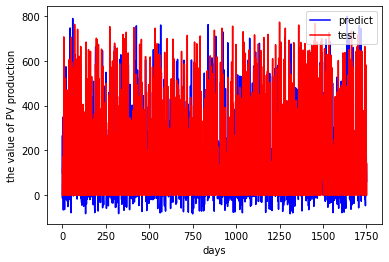

In [570]:
#################################

# state columns for x-axis and y-axis
x = df.loc[:, ('temp', 'relative humidity', 'diffuse radiation, tilt')]
y = df.loc[:, 'PV production']

# use a random seed to split train set and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=123)
print('train sets and test sets information:')
print('x_train.shape={}\ny_train.shape ={}\nx_test.shape={}\ny_test.shape={}'
      .format(x_train.shape, y_train.shape, x_test.shape, y_test.shape))

# build the multivariate linear regression model
reg = LinearRegression()
model = reg.fit(x_train, y_train)

# print the model information
print("model:")
print(model)
print('intercept:')
print(reg.intercept_)
print('coef:')
print(reg.coef_)

# plot ROC curve
y_pred = reg.predict(x_test)
plt.figure()
plt.plot(range(len(y_pred)), y_pred, 'b', label="predict")
plt.plot(range(len(y_pred)), y_test, 'r', label="test")
plt.legend(loc="upper right")
plt.xlabel("days")
plt.ylabel('the value of PV production')
plt.show()

#################################

<AxesSubplot:xlabel='DateTime'>

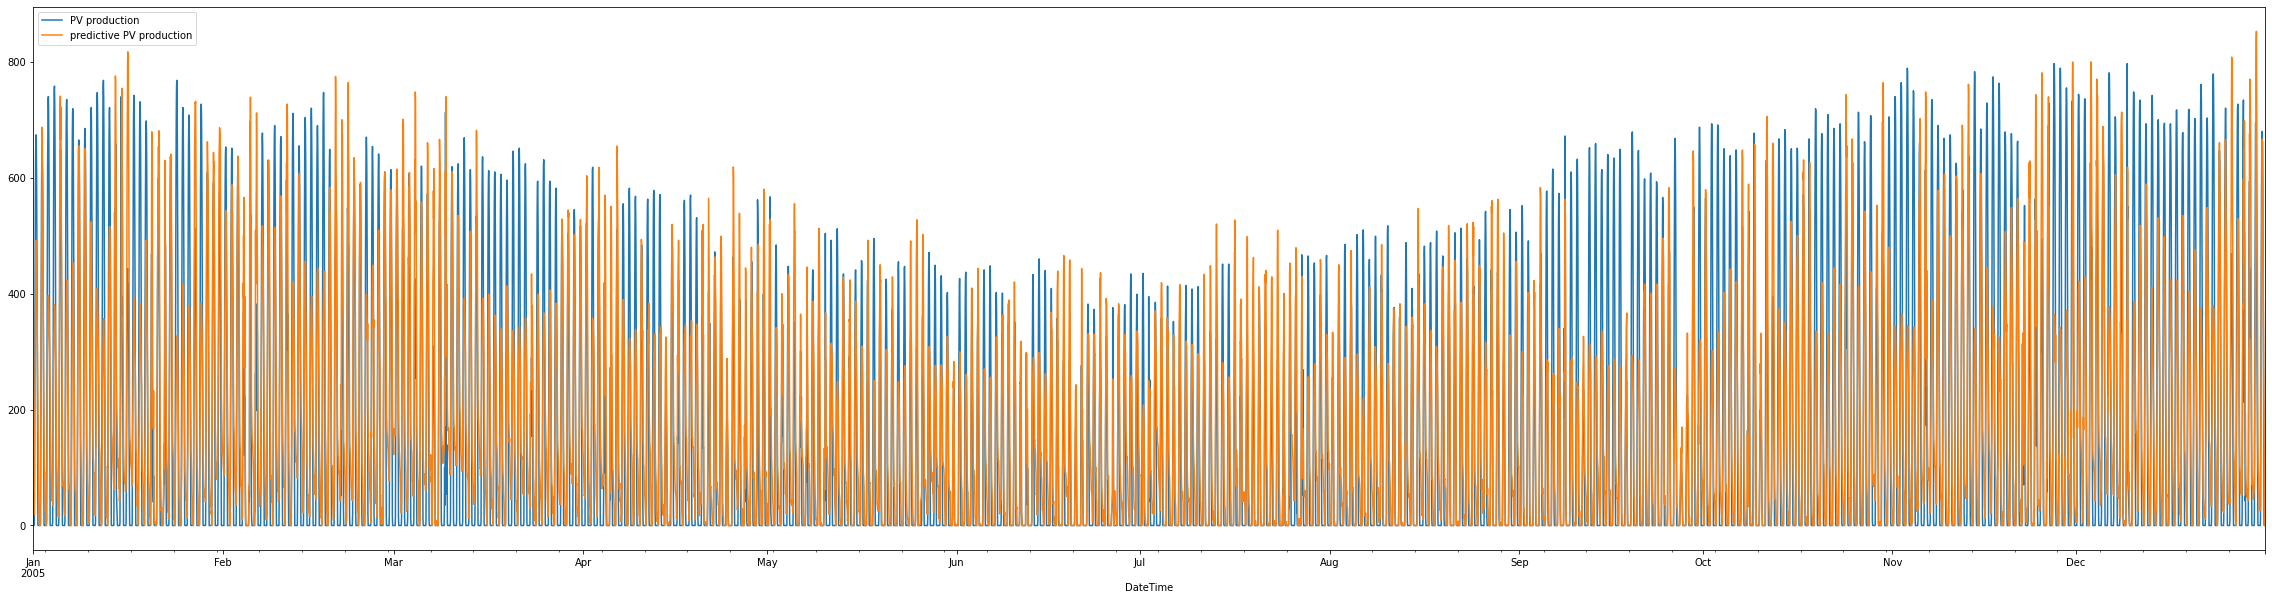

In [571]:
#################################

def get_predictive_PV_production(df):
    predictive_value = reg.coef_[0] * df['temp']  + reg.coef_[1] * df['relative humidity'] + reg.coef_[2] * df['diffuse radiation, tilt'] + reg.intercept_
    if predictive_value < 0:
        return 0
    return predictive_value

df.loc[:, 'predictive PV production'] = df.apply(get_predictive_PV_production, axis=1)
df[['PV production', 'predictive PV production']].plot(figsize=(40, 10))

#################################
